In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
def readData():
    idx = 0
    data = pd.read_csv('./data/netflix/combined_data_' + str(idx) + '.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
    for i in range(idx, 5):
        data_temp = pd.read_csv('./data/netflix/combined_data_' + str(i) + '.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
        data = pd.concat([data, data_temp])
    data['Rating'] = data['Rating'].astype(float)
    data.index = np.arange(0, len(data))
    return data

In [40]:
data = pd.read_csv('./data/netflix/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [41]:
data['Rating'] = data['Rating'].astype(float)
print(data.shape)
print(data.iloc[0::400, :])

(24058263, 2)
          Cust_Id  Rating
0              1:     NaN
400       1653834     4.0
800       1456369     4.0
1200        61765     4.0
1600       592455     2.0
...           ...     ...
24056400  2479109     5.0
24056800  2248482     5.0
24057200  2373691     2.0
24057600  1925428     1.0
24058000  2335640     2.0

[60146 rows x 2 columns]


<AxesSubplot:xlabel='Rating'>

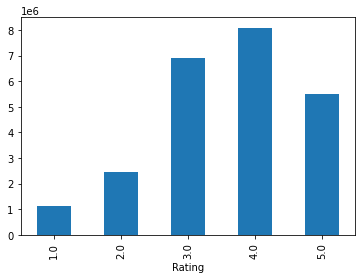

In [42]:
# Viewing the data

rates = data.groupby('Rating')['Rating'].count()
rates.plot(kind = 'bar')

In [63]:
ratesByCust = data.groupby('Cust_Id', as_index=False)['Rating'].count()


In [64]:
ratesByCust = ratesByCust.groupby('Rating')['Rating'].count()

<AxesSubplot:xlabel='Rating'>

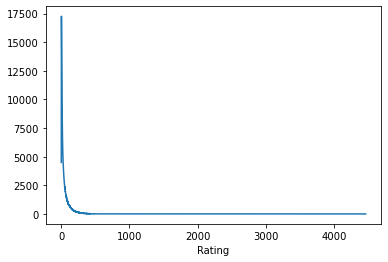

In [65]:
ratesByCust.plot(kind = 'line')

In [66]:
df = data

In [67]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [68]:
# remove those Movie ID rows
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

/tmp/ipykernel_13048/2609185946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)


-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


/tmp/ipykernel_13048/2609185946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] = df['Cust_Id'].astype(int)


In [69]:
df.to_csv('./data/netflix/netflix_process_data.csv', index = False)